# Data preparation

In [2]:
import pandas as pd


df1 = pd.read_csv("/content/churn.csv")


In [5]:
columns = df1.columns
# Find numerical columns
numerical_cols = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", numerical_cols)

# Find categorical columns
categorical_cols = df1.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)

Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-n

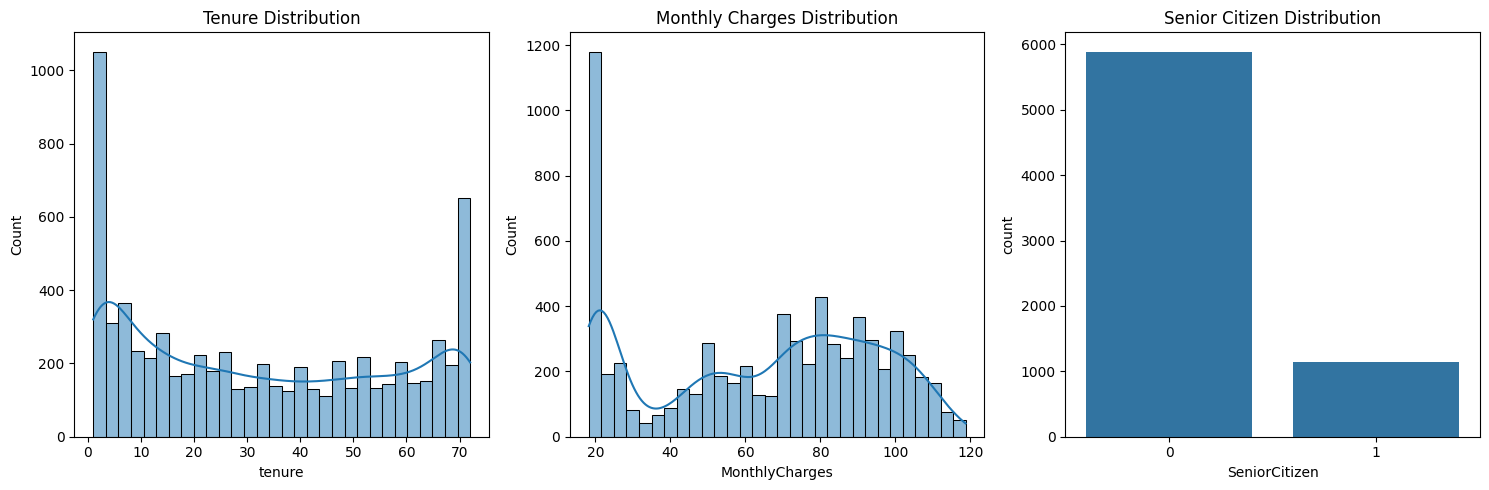

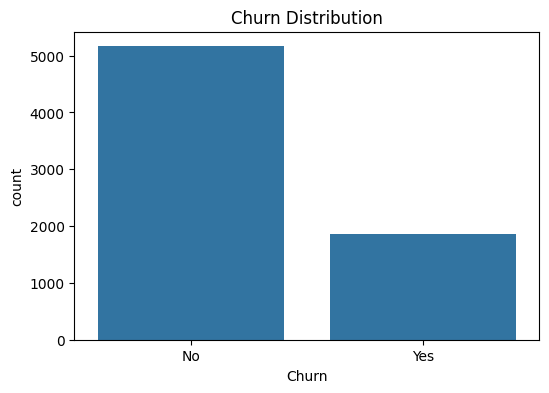

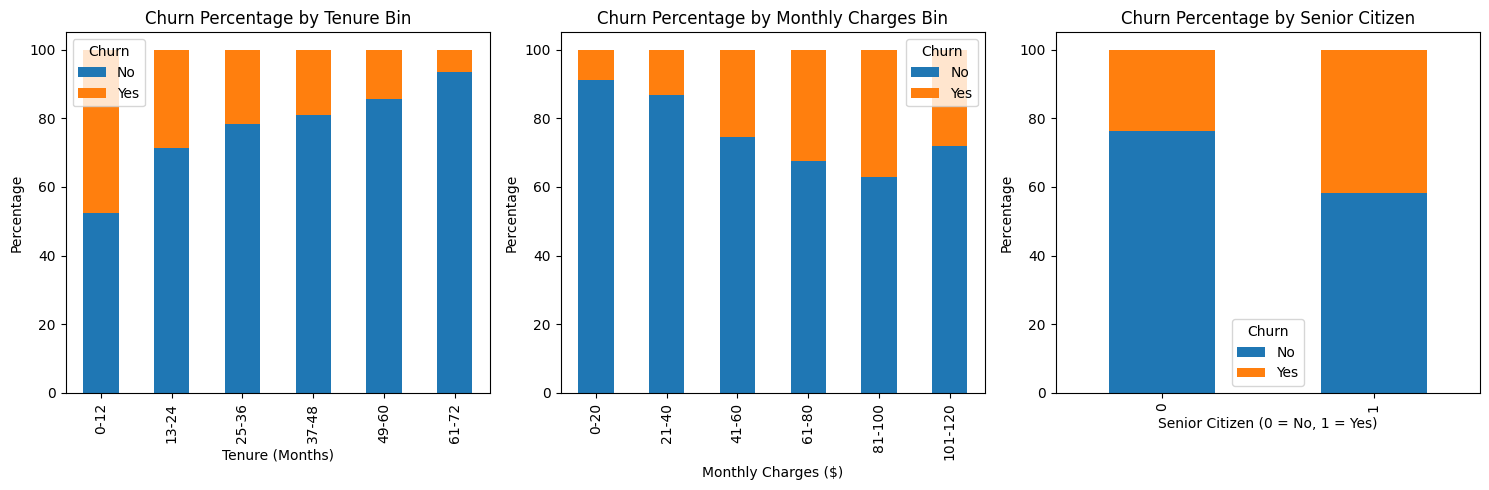

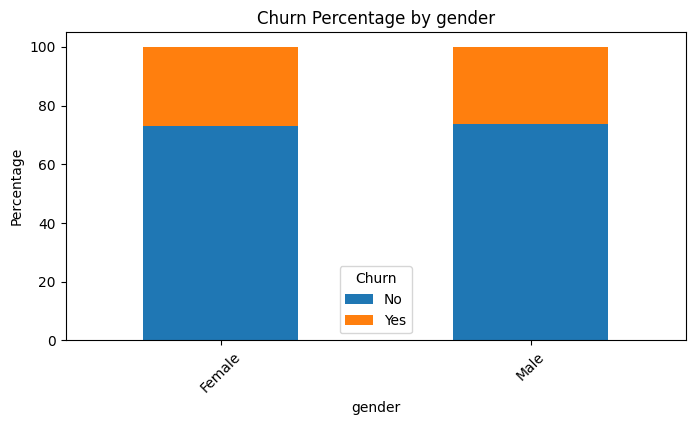

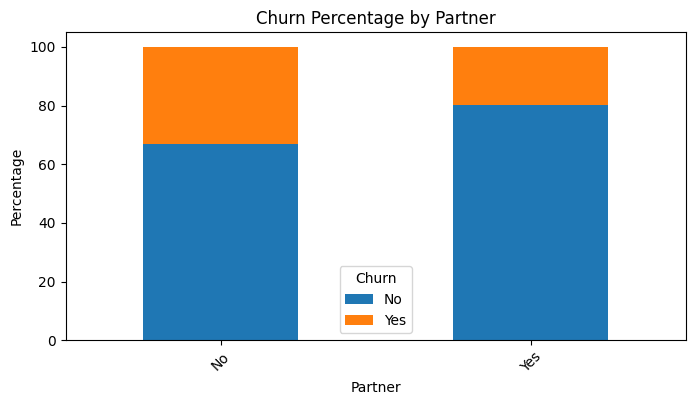

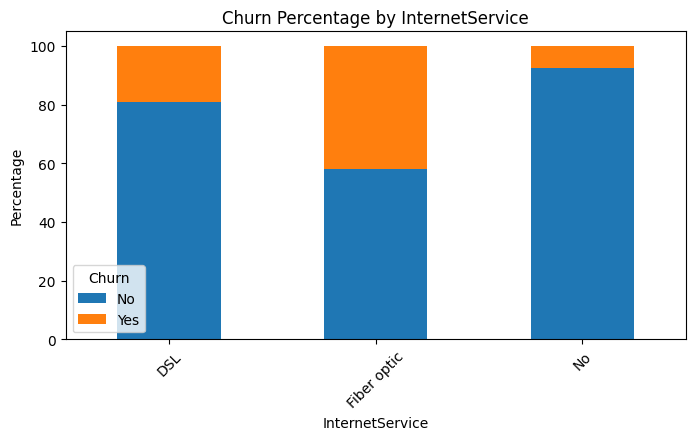

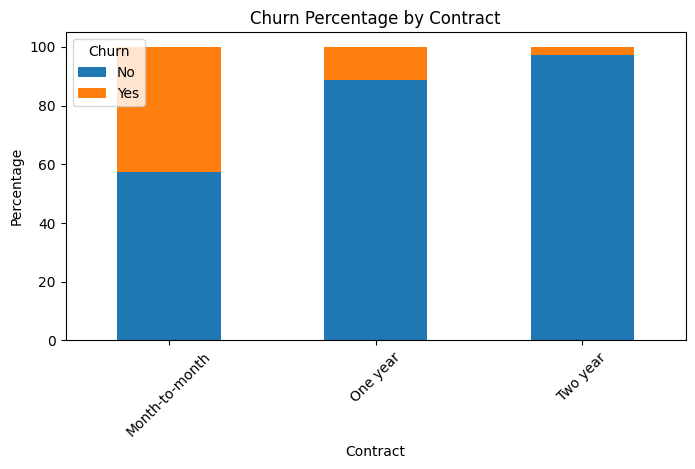

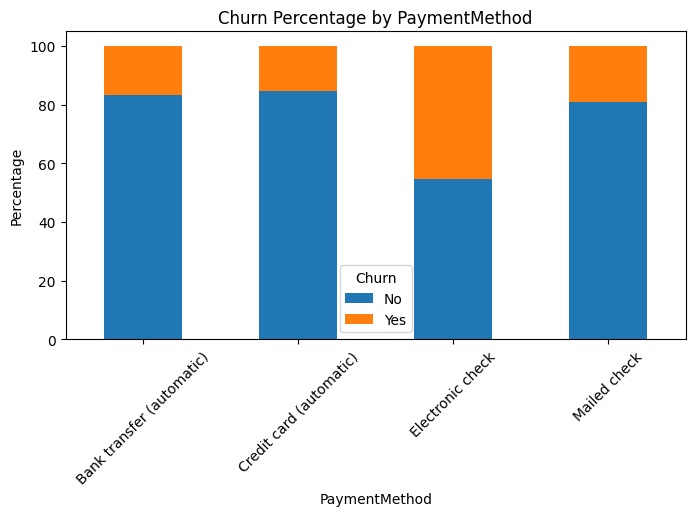

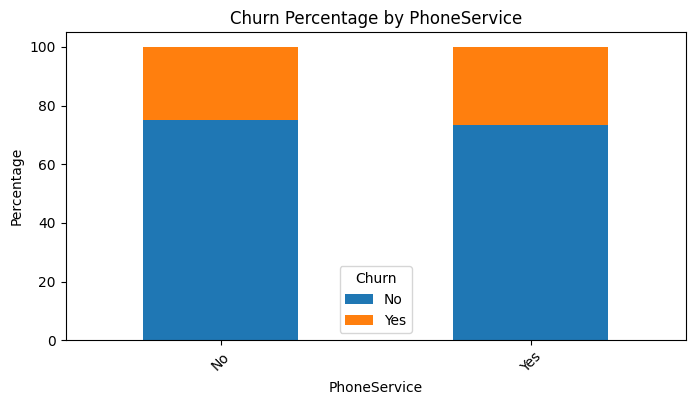

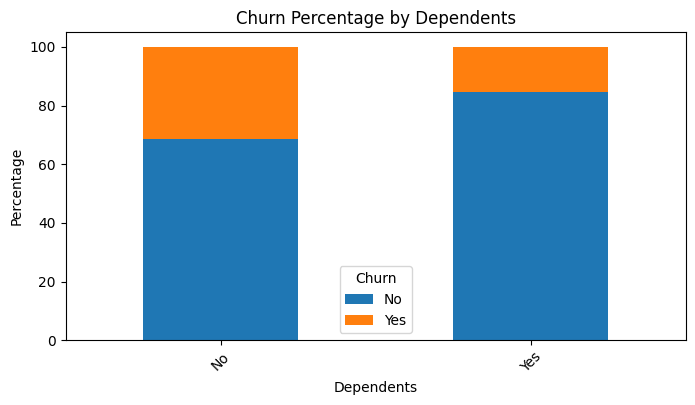

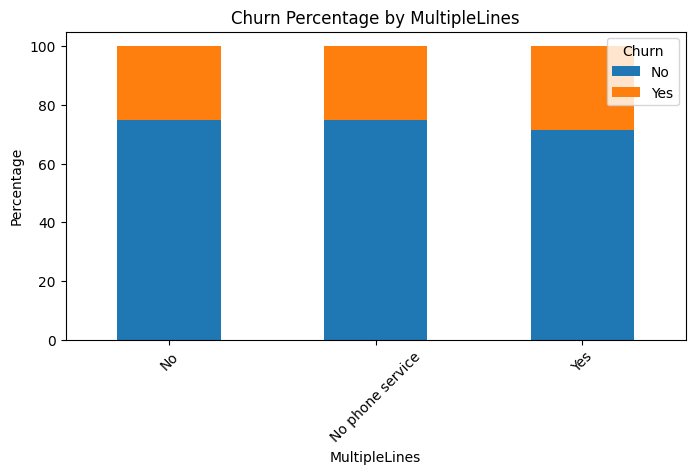

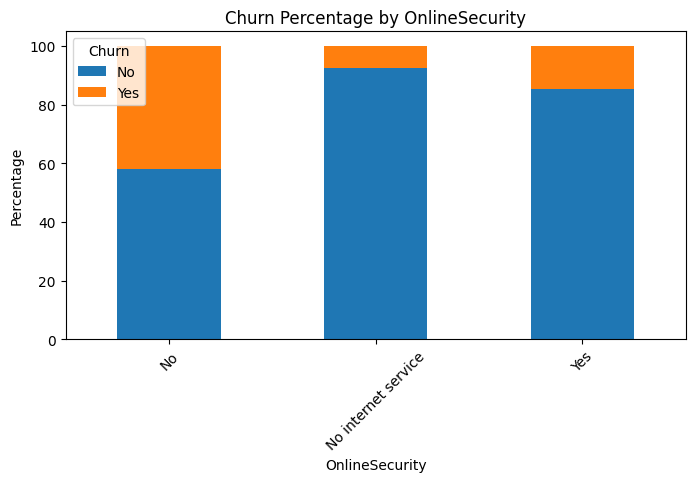

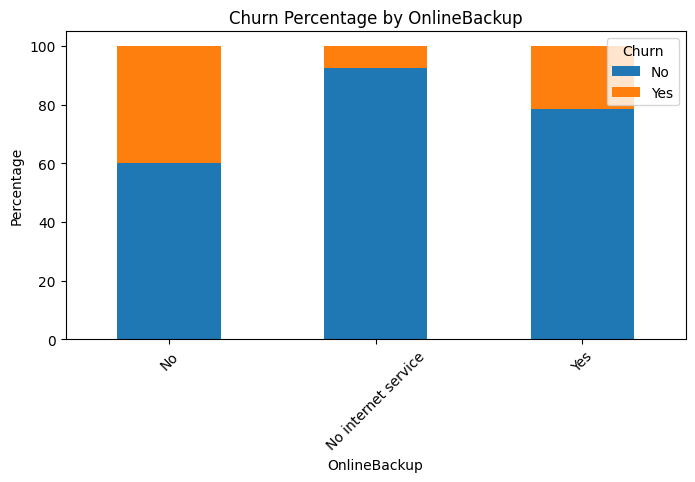

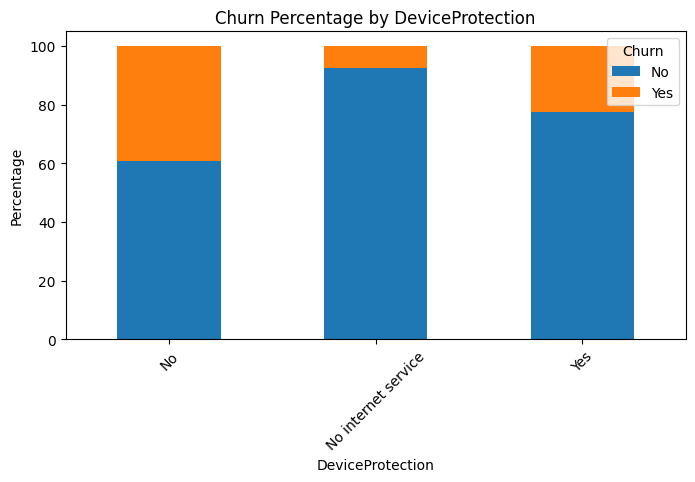

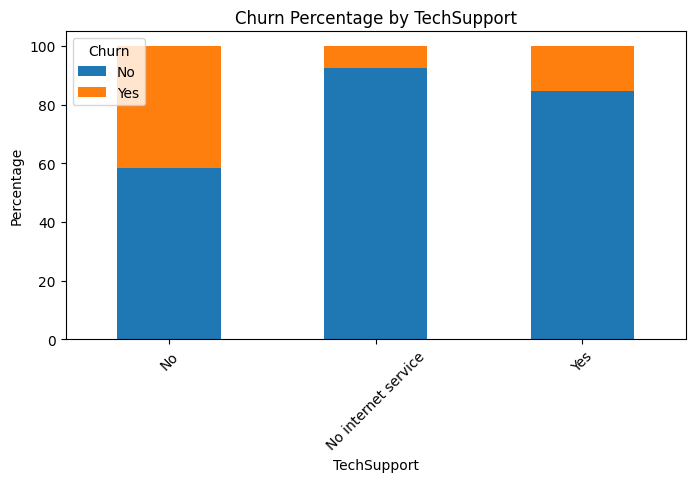

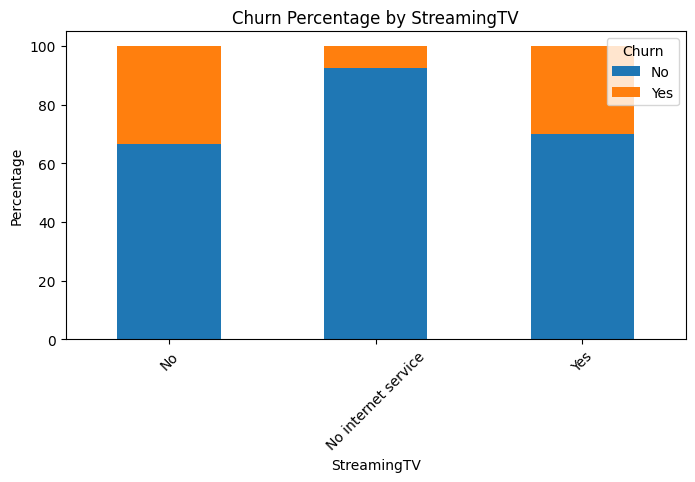

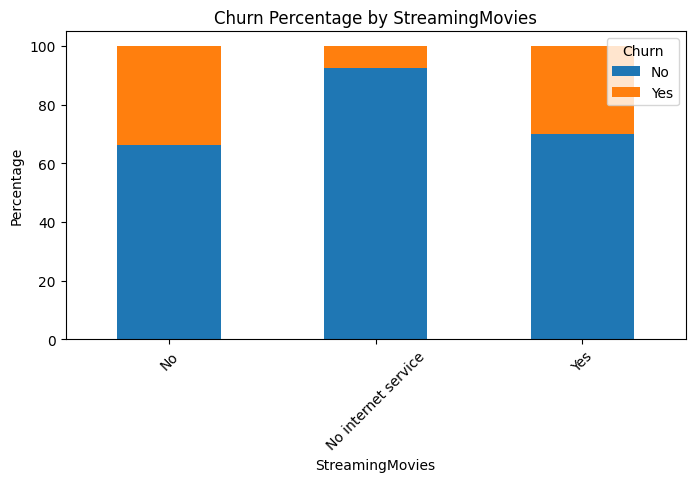

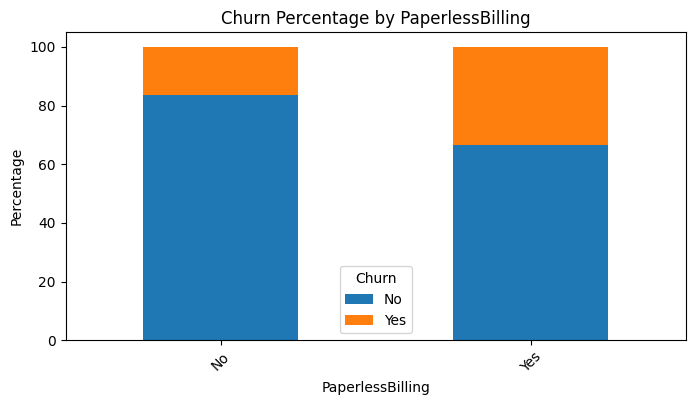

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Basic Overview (unchanged)
print("Dataset Info:")
print(df1.info())
print("\nMissing Values:")
print(df1.isnull().sum())

# 2. Summary Statistics for Numerical Columns (unchanged)
print("\nSummary Statistics for Numerical Columns:")
print(df1[['SeniorCitizen', 'tenure', 'MonthlyCharges']].describe())

# 3. Distribution of Numerical Columns (unchanged)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df1['tenure'], bins=30, kde=True)
plt.title('Tenure Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df1['MonthlyCharges'], bins=30, kde=True)
plt.title('Monthly Charges Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='SeniorCitizen', data=df1)
plt.title('Senior Citizen Distribution')

plt.tight_layout()
plt.show()

# 4. Churn Distribution (Target Variable) (unchanged)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df1)
plt.title('Churn Distribution')
plt.show()

# 5. Numerical Features vs Churn (Modified to Show Percentages)
plt.figure(figsize=(15, 5))

# 5.1 Tenure vs Churn (Percentage)
# Bin tenure into categories
df1['tenure_bin'] = pd.cut(df1['tenure'], bins=[0, 12, 24, 36, 48, 60, 72, 100],
                           labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72', '73+'])

# Calculate churn percentage for each tenure bin
tenure_churn = pd.crosstab(df1['tenure_bin'], df1['Churn'], normalize='index') * 100

# Plot as a stacked bar plot
plt.subplot(1, 3, 1)
tenure_churn.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Churn Percentage by Tenure Bin')
plt.ylabel('Percentage')
plt.xlabel('Tenure (Months)')

# 5.2 MonthlyCharges vs Churn (Percentage)
# Bin MonthlyCharges into categories
df1['MonthlyCharges_bin'] = pd.cut(df1['MonthlyCharges'], bins=[0, 20, 40, 60, 80, 100, 120, 150],
                                   labels=['0-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121+'])

# Calculate churn percentage for each MonthlyCharges bin
monthly_churn = pd.crosstab(df1['MonthlyCharges_bin'], df1['Churn'], normalize='index') * 100

# Plot as a stacked bar plot
plt.subplot(1, 3, 2)
monthly_churn.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Churn Percentage by Monthly Charges Bin')
plt.ylabel('Percentage')
plt.xlabel('Monthly Charges ($)')

# 5.3 SeniorCitizen vs Churn (Already a count plot, but let’s show percentages)
# Calculate percentage for SeniorCitizen
senior_churn = pd.crosstab(df1['SeniorCitizen'], df1['Churn'], normalize='index') * 100

# Plot as a stacked bar plot
plt.subplot(1, 3, 3)
senior_churn.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Churn Percentage by Senior Citizen')
plt.ylabel('Percentage')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')

plt.tight_layout()
plt.show()

# 6. Categorical Features vs Churn (Modified to Show Percentages)
cat_columns_to_plot = ['gender', 'Partner', 'InternetService', 'Contract', 'PaymentMethod',
                      'PhoneService', 'Dependents', 'MultipleLines', 'OnlineSecurity',
                      'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                      'StreamingMovies', 'PaperlessBilling']

for col in cat_columns_to_plot:
    plt.figure(figsize=(8, 4))
    # Calculate percentage
    cat_churn = pd.crosstab(df1[col], df1['Churn'], normalize='index') * 100
    # Plot as a stacked bar plot
    cat_churn.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Churn Percentage by {col}')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.show()

# Drop temporary columns
df1 = df1.drop(['tenure_bin', 'MonthlyCharges_bin'], axis=1)


In [33]:
df_encoded = df1.drop(['gender', 'PhoneService', 'MultipleLines','SeniorCitizen', 'tenure', 'MonthlyCharges'],axis = 1)
df2 = df1[['MonthlyCharges', 'tenure', 'SeniorCitizen']]

In [34]:

df_encoded = pd.get_dummies(df_encoded, columns=df_encoded.columns, prefix=df_encoded.columns,drop_first=True)

In [35]:
df_encoded.columns

Index(['Partner_Yes', 'Dependents_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [36]:
df_for_ml = pd.concat([df_encoded, df2], axis=1)
df_for_ml.columns

Index(['Partner_Yes', 'Dependents_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes', 'MonthlyCharges', 'tenure', 'SeniorCitizen'],
      dtype='object')

In [37]:
X = df_for_ml.drop('Churn_Yes', axis=1)
y = df_for_ml['Churn_Yes']


In [64]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to a DataFrame for easier handling
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Churn_Yes'] = y_resampled

# Check the new class distribution
print("Churn distribution after SMOTE:")
print(df_resampled['Churn_Yes'].value_counts(normalize=True))

Churn distribution after SMOTE:
Churn_Yes
False    0.5
True     0.5
Name: proportion, dtype: float64


In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=114514)
#split data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tree

# Try GridSearchCV to find best parameters for DecisionTreeClassifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [67]:

rf = DecisionTreeClassifier(random_state=114514)
num_leafs = range(10,30)
# Define the parameter grid
param_grid = {
    'max_depth': np.arange(2,10,1),
    'min_samples_leaf': num_leafs,

}

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}") #f1score

# Evaluate on test set
best_rf = grid_search.best_estimator_
test_score = best_rf.score(X_test, y_test)
print(f"Test set score: {test_score}")

Best parameters: {'max_depth': np.int64(7), 'min_samples_leaf': 15}
Best cross-validation score: 0.7952418171438642
Test set score: 0.7982569399612653


# train

In [69]:

tree_model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=15) #best choie so far
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=15)

In [70]:
y_pred = tree_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1179  340]
 [ 285 1294]]


In [71]:
# Perform 10-fold cross-validation
scores = cross_val_score(tree_model, X_train, y_train, cv=10, scoring='roc_auc')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.87206143 0.85991307 0.85662249 0.86586672 0.87726334 0.84194918
 0.86908625 0.87011556 0.86452514 0.87943935]
Mean Accuracy: 0.8656842523176274


In [77]:

y_pred = tree_model.predict(X_test)




In [78]:

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Confusion Matrix:
 [[1179  340]
 [ 285 1294]]
Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.78      0.79      1519
        True       0.79      0.82      0.81      1579

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.80      3098
weighted avg       0.80      0.80      0.80      3098



AUC: 0.8663019110686216


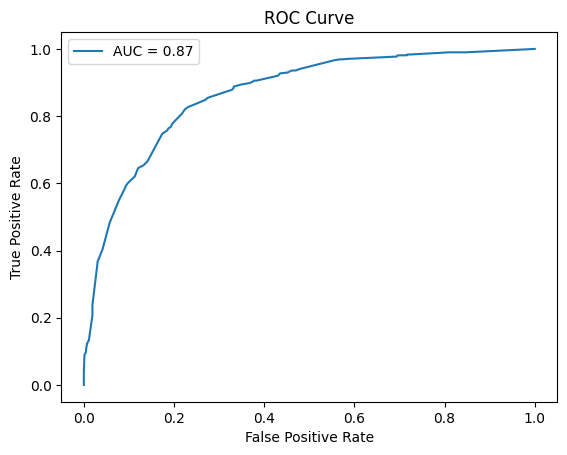

In [79]:
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [80]:
# Get feature importances
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': tree_model.feature_importances_
})
importances = importances.sort_values('importance', ascending=False)

# Print top 5-10 most important features
print("Most important features:")
print(importances)



Most important features:
                                  feature  importance
20         PaymentMethod_Electronic check    0.393937
23                                 tenure    0.297960
2             InternetService_Fiber optic    0.088775
22                         MonthlyCharges    0.064557
18                   PaperlessBilling_Yes    0.050918
19  PaymentMethod_Credit card (automatic)    0.029369
21             PaymentMethod_Mailed check    0.024802
17                      Contract_Two year    0.014068
15                    StreamingMovies_Yes    0.008268
9                    DeviceProtection_Yes    0.006811
13                        StreamingTV_Yes    0.006274
0                             Partner_Yes    0.003947
10        TechSupport_No internet service    0.003760
5                      OnlineSecurity_Yes    0.002953
24                          SeniorCitizen    0.002480
7                        OnlineBackup_Yes    0.001087
1                          Dependents_Yes    0.000032
8  

#LogisticRegression

In [82]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [83]:
scores = cross_val_score(model, X, y, cv=10)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
# something appear but it seems normal

Cross-Validation Scores: [0.79545455 0.81676136 0.79943101 0.82219061 0.77951636 0.79943101
 0.81081081 0.80369844 0.79089616 0.80227596]
Mean Accuracy: 0.8020466264709686


In [84]:
y_pred = model.predict(X_test_scaled)
y_probs = model.predict_proba(X_test_scaled)[:, 1]

In [85]:
custom_threshold = 0.5  # Set your desired threshold
y_pred_custom = (y_probs >= custom_threshold).astype(int)

In [86]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Confusion Matrix:
 [[1157  362]
 [ 288 1291]]
Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.76      0.78      1519
        True       0.78      0.82      0.80      1579

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.79      3098
weighted avg       0.79      0.79      0.79      3098



AUC: 0.87817390945428


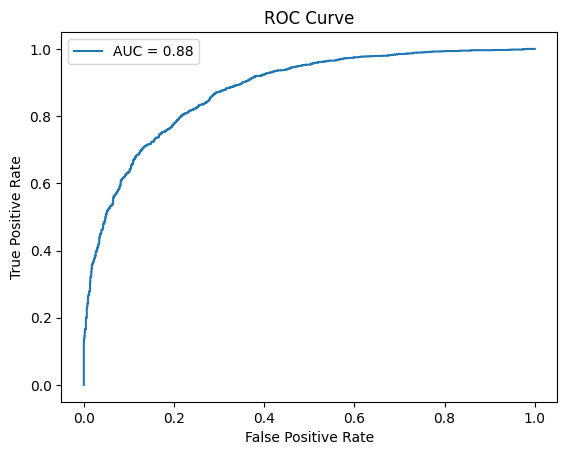

In [87]:
auc = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc}")


fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#lasso


In [88]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score

In [89]:

param_grid = {"C": [10**i for i in np.arange(-4, 0, 0.1)]}

# Initialize the Logistic Regression model with L1 penalty
lasso_log_reg = LogisticRegression(penalty='l1', solver='liblinear')

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=lasso_log_reg, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the GridSearchCV to your data
grid_search.fit(X, y)

# Retrieve the best parameters and model
best_C = grid_search.best_params_['C']
best_model = grid_search.best_estimator_

print(f"Best C: {best_C}")
print(f"Best model: {best_model}")


Best C: 0.1584893192461124
Best model: LogisticRegression(C=np.float64(0.1584893192461124), penalty='l1',
                   solver='liblinear')


In [90]:


# Predict on the test set
lasso_log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=0.1584893192461124)
lasso_log_reg.fit(X_train_scaled, y_train)
lasso_y_pred = lasso_log_reg.predict(X_test_scaled)


y_pred = lasso_log_reg.predict(X_test_scaled)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)





Confusion Matrix:
 [[1163  356]
 [ 289 1290]]
Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.77      0.78      1519
        True       0.78      0.82      0.80      1579

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.79      3098
weighted avg       0.79      0.79      0.79      3098



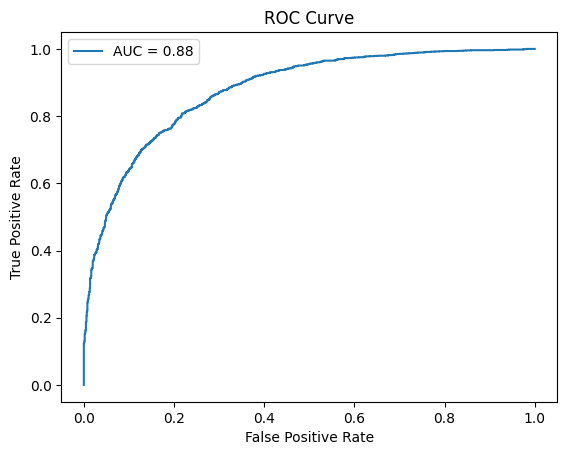

In [91]:
lasso_probabilities = lasso_log_reg.predict_proba(X_test_scaled)[:, 1]
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, lasso_probabilities)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [93]:
# Get feature importances
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': tree_model.feature_importances_
})
importances = importances.sort_values('importance', ascending=False)

# Print top 5-10 most important features
print("Most important features:")
print(importances)

Most important features:
                                  feature  importance
20         PaymentMethod_Electronic check    0.393937
23                                 tenure    0.297960
2             InternetService_Fiber optic    0.088775
22                         MonthlyCharges    0.064557
18                   PaperlessBilling_Yes    0.050918
19  PaymentMethod_Credit card (automatic)    0.029369
21             PaymentMethod_Mailed check    0.024802
17                      Contract_Two year    0.014068
15                    StreamingMovies_Yes    0.008268
9                    DeviceProtection_Yes    0.006811
13                        StreamingTV_Yes    0.006274
0                             Partner_Yes    0.003947
10        TechSupport_No internet service    0.003760
5                      OnlineSecurity_Yes    0.002953
24                          SeniorCitizen    0.002480
7                        OnlineBackup_Yes    0.001087
1                          Dependents_Yes    0.000032
8  

# Task 2

In [99]:
#calculating the cost
tree_model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=15) #best choie so far
tree_model.fit(X_train, y_train)
tree_y_pred = tree_model.predict(X_test)
cm = confusion_matrix(y_test, tree_y_pred)
print(cm)

false_negatives_indices = np.where((y_test == 1) & (tree_y_pred == 0))[0]
false_positives_indices = np.where((y_test == 0) & (tree_y_pred == 1))[0]


false_negatives_rows = X_test.iloc[false_negatives_indices]
false_positives_rows = X_test.iloc[false_positives_indices]

number_of_FN = len(false_negatives_rows)
number_of_FP = len(false_positives_rows)

loss_of_tree = np.sum(false_negatives_rows.MonthlyCharges)*12 -205*number_of_FN+number_of_FP*205
print(f"cost of tree : {loss_of_tree}")

#-------------------------------------------------------------------------------------------------
# lasso
lasso_log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=0.1584893192461124)
lasso_log_reg.fit(X_train_scaled, y_train)
lasso_y_pred = lasso_log_reg.predict(X_test_scaled)
false_negatives = np.where((y_test == 1) & (lasso_y_pred == 0))
false_positives = np.where((y_test == 0) & (lasso_y_pred == 1))

cm = confusion_matrix(y_test, lasso_y_pred)
print(cm)
FP = cm[0, 1]
FN = cm[1, 0]

false_negatives_indices = np.where((y_test == 1) & (lasso_y_pred == 0))[0]
false_positives_indices = np.where((y_test == 0) & (lasso_y_pred == 1))[0]

false_negatives_rows = X_test.iloc[false_negatives_indices]
false_positives_rows = X_test.iloc[false_positives_indices]

number_of_FN = len(false_negatives_rows)
number_of_FP = len(false_positives_rows)

loss_of_lasso = np.sum(false_negatives_rows.MonthlyCharges)*12 -205*number_of_FN+number_of_FP*205
print(f"cost of lasso {loss_of_lasso}")



[[1179  340]
 [ 285 1294]]
cost of tree : 247954.46534113874
[[1163  356]
 [ 289 1290]]
cost of lasso 234955.50862001494


In [100]:
print(len(false_negatives_rows))

289


In [101]:

lasso_probabilities = lasso_log_reg.predict_proba(X_test_scaled)[:, 1]

# Set your desired threshold
threshold = 0.28 # Example threshold

# Adjust predictions based on the threshold
lasso_y_pred_adjusted = (lasso_probabilities >= threshold).astype(int)


cm_adjusted = confusion_matrix(y_test, lasso_y_pred_adjusted)
print(cm_adjusted)


[[ 878  641]
 [ 109 1470]]


In [102]:
#finding best threshold
def calculate_cost(y_true, y_pred_proba, threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)

    # Calculate confusion matrix elements
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    false_negatives_indices = np.where((y_test == 1) & (y_pred == 0))[0]

    false_negatives_rows = X_test.iloc[false_negatives_indices]

    # Calculate costs
    # Cost of false negatives: loss of contract value
    cost_FN = np.sum(false_negatives_rows.MonthlyCharges) * 12 - 205 * FN
    # Cost of false positives: cost of sending retention offers
    cost_FP = 205 * FP
    total_cost = cost_FN + cost_FP
    return total_cost


thresholds = np.arange(0.0, 1.0, 0.01)

# Initialize variables to store the best cost and threshold
best_cost_tree = float('inf')
best_cost_lasso = float('inf')
best_threshold_of_tree = 0
best_threshold_of_lasso = 0

# Calculate costs for both models
for threshold in thresholds:
    # Decision Tree
    tree_cost = calculate_cost(y_test, tree_model.predict_proba(X_test)[:, 1],  threshold)

    # Lasso Logistic Regression
    lasso_cost = calculate_cost(y_test, lasso_log_reg.predict_proba(X_test_scaled)[:, 1],  threshold)

    # Update best cost and threshold for Decision Tree
    if tree_cost < best_cost_tree:
        best_cost_tree = tree_cost
        best_threshold_of_tree = threshold

    # Update best cost and threshold for Lasso
    if lasso_cost < best_cost_lasso:
        best_cost_lasso = lasso_cost
        best_threshold_of_lasso = threshold

print(f"Best tree Threshold: {best_threshold_of_tree}")
print(f"Minimal tree Total Cost: {best_cost_tree}")
print(f"Best lasso Threshold: {best_threshold_of_lasso}")
print(f"Minimal lasso Total Cost: {best_cost_lasso}")

Best tree Threshold: 0.36
Minimal tree Total Cost: 190752.49235025223
Best lasso Threshold: 0.33
Minimal lasso Total Cost: 195007.99129493698


# compare data-driven solutions with two baselines strategies

In [104]:
# doing nothing
# seems wrong modifie later
#need -205
cost_doing_nothing = np.sum(false_negatives_rows.MonthlyCharges)*12-205*len(false_negatives_rows)
print(f"cost of doing nothing: {cost_doing_nothing}")

# send everyone
cost_sending_everyone = 205*len(X_test)
print(f"cost of sending retention to everyone: {cost_sending_everyone}")

# So data-driven solutions are better,cause the cost of data-driven solutions are lower.

cost of doing nothing: 1100800.9410723716
cost of sending retention to everyone: 635090


In [108]:
proba_of_tree = tree_model.predict_proba(X_test)[:, 1]
proba_of_lasso = lasso_log_reg.predict_proba(X_test_scaled)[:, 1]
a = X_test.MonthlyCharges*12*proba_of_lasso-205
send_indic = np.where((a > 0))[0]
send = X_test.iloc[send_indic]
cost_of_lasso = 205*len(send)
print(f"cost_of_lasso is {cost_of_lasso}")


b = X_test.MonthlyCharges*12*proba_of_tree-205
send_indic = np.where((b > 0))[0]
send = X_test.iloc[send_indic]
cost_of_tree = 205*len(send)
print(f"cost_of_tree is {cost_of_tree}")

cost_of_lasso is 404875
cost_of_tree is 401390


In [109]:
# Conclusions
if best_cost_tree < cost_doing_nothing and best_cost_tree < cost_sending_everyone:
    print("The Decision Tree model is better than both baseline strategies.")
else:
    print("The Decision Tree model is not better than both baseline strategies.")

if best_cost_lasso < cost_doing_nothing and best_cost_lasso < cost_sending_everyone:
    print("The Lasso Regression model is better than both baseline strategies.")
else:
    print("The Lasso Regression model is not better than both baseline strategies.")

The Decision Tree model is better than both baseline strategies.
The Lasso Regression model is better than both baseline strategies.
